# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [5]:
# Import relevant libraries
# webstuff
# from splinter import Browser
# from bs4 import BeautifulSoup as soup
# from webdriver_manager.chrome import ChromeDriverManager
# the goods
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html,'html.parser')


In [5]:
# Extract all rows of data
slide_elem = html_soup.find_all("tr", class_='data-row')

In [6]:
# Create an empty list
row_list = []

# Loop through the scraped data to create a list of rows
for row in slide_elem:
    td = row.find_all('td')
    data = [x.text for x in td]
    row_list.append(data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'
df=pd.DataFrame(row_list, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [ ]:
# Write the data to a CSV
df.to_csv("results.csv", encoding='utf8', index=False)

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [6]:
df = pd.read_csv('results.csv')
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [7]:
# Change data types for data analysis
df['terrestrial_date'] = df['terrestrial_date'].apply(pd.to_datetime)
df[['sol','ls','month']] = df[['sol','ls','month']].astype(int)
df[['min_temp','pressure']] = df[['min_temp','pressure']].astype(float)

In [8]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# 1. How many months are there on Mars?
len(df['month'].unique())

12

In [14]:
# 2. How many Martian days' worth of data are there?
df['terrestrial_date'].nunique()

1867

In [17]:
# 3. What is the average low temperature by month?
min_temp_group = df.groupby(['month'])[['min_temp']].mean()
min_temp_group

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


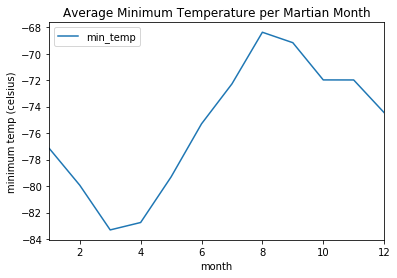

In [73]:
# 4. Plot the average temperature by month
min_temp_group.plot()
plt.ylabel('minimum temp (celsius)')
plt.title('Average Minimum Temperature per Martian Month')
plt.savefig('mars_temp.png')



In [32]:
# 5. Identify the coldest and hottest months in Curiosity's location
# df.groupby('month', as_index=False).agg({'min_temp': np.mean}).sort_values(by="min_temp").plot.bar(x = 'month')
coldest, warmest = min_temp_group["min_temp"].min(), min_temp_group["min_temp"].max()
print('coldest month:\n',min_temp_group[min_temp_group["min_temp"]==coldest],'\n\n')
print('warmest month:\n',min_temp_group[min_temp_group["min_temp"]==warmest])



coldest month:
         min_temp
month           
3     -83.307292 


warmest month:
         min_temp
month           
8     -68.382979


In [34]:
# 4. Average pressure by Martian month
pressure_group = df.groupby(['month'])[['pressure']].mean()
pressure_group

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


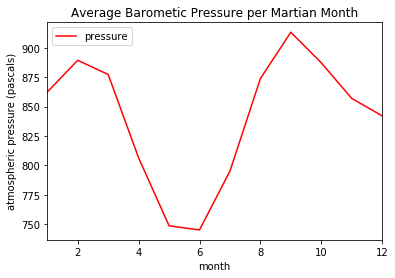

In [72]:
# Plot the average pressure by month.Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.
pressure_group.plot(color='red')
plt.ylabel('atmospheric pressure (pascals)')
plt.title('Average Barometic Pressure per Martian Month')
plt.savefig('mars_pressure.png')


668 mars days (sols) around the sun.  Interval between peaks (or troughs) of Solar Longitude represent a year


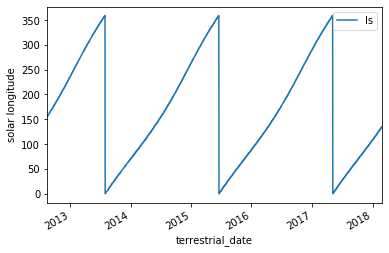

In [70]:
# 5. How many terrestrial (earth) days are there in a Martian year?

df.plot(x='terrestrial_date', y='ls')
plt.ylabel('solar longitude')
plt.savefig('solar_longitude.png')

df.sort_values(by='ls', ascending=False).head()

high_solar_longitude = df[(df['terrestrial_date']=='2017-05-04') | (df['terrestrial_date']=='2015-06-18')] # two maximal ls points
high_solar_longitude.reset_index(inplace=True)
elapsed_sols = high_solar_longitude.loc[1]['sol'] - high_solar_longitude.loc[0]['sol']  # sol distance between closest max ls points
print(f'{elapsed_sols} mars days (sols) around the sun.  Interval between peaks (or troughs) of Solar Longitude represent a year')

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv("results.csv", encoding='utf8', index=False)

In [21]:
browser.quit()